In [75]:


def batter_pitch_grapher(mlb_id, metric, pitch_type):
    
    from pybaseball import statcast_batter
    
    import matplotlib.pyplot as plt
    
    import pandas as pd
    
    import matplotlib.patches as patches
    
    from datetime import datetime
    
    today = datetime.today().strftime('%Y-%m-%d')
    
    #gets pitch data for chosen player
    data = statcast_batter('2015-3-30', today, player_id = mlb_id)
    
    #removes all pitches that are intentional balls or pitchouts
    necessary = data.loc[(data['description']!= 'intent_ball') | (data['pitch_type']!='PO')]
    
    fixed = necessary.loc[(necessary['plate_x']<= 2.2)&(necessary['plate_x']>= -2.2)]
    
    #gets the mean of every available stat (will be used to generate strikezone)
    avgs = data.describe()
    
    #gets the average top measurement of the strikezone for the specific player
    top_sz = avgs['sz_top'][1]
    
    #gets the average bottom measurement of the strikezone for the specific player
    bot_sz = avgs['sz_bot'][1]
    
    new_data = fixed.loc[(fixed['plate_z']<= (top_sz+0.75))&(fixed['plate_z']>= 0)]
    
    fig, ax = plt.subplots()
    
    #generates strikezone using the measurements we got above
    strikezone = patches.Rectangle((-0.70833,bot_sz), width= 17/12, height = (top_sz-bot_sz), fill=False)
    
    offspeed = new_data.loc[new_data['pitch_type'].isin(['CU', 'SL', 'CH', 'KC', 'EP'])]
    
    fballs = new_data.loc[new_data['pitch_type'].isin(['FF', 'FC', 'FT', 'SI', 'FS'])]
    
    all_swings = new_data.loc[(new_data.description.isin(['swinging_strike', 'hit_into_play_no_out',
                                                       'foul', 'hit_into_play', 'foul_bunt',
                                                        'hit_into_play_score', 'swinging_strike_blocked', 
                                                        'foul_tip']))]
    
    if metric == 'Swing and Miss Rate':
        
        if pitch_type == 'offspeed':
            
            offspeed_swings = all_swings.loc[all_swings['pitch_type'].isin(['CU', 'SL', 'CH', 'KC', 'EP'])]
            
            graph = ax.hexbin(offspeed_swings['plate_x'],offspeed_swings['plate_z'], C = 
                              (offspeed_swings['description']== 'swinging_strike')|
                          (offspeed_swings['description']=='swinging_strike_blocked'),
                          gridsize=(6,6), mincnt=5, vmax = 1,vmin =0, cmap = 'Reds')
            
            pitch_text = pitch_type
            
            
        elif pitch_type == 'fastballs':
            
            fball_swings = all_swings.loc[all_swings['pitch_type'].isin(['FF', 'FC', 'FT', 'SI', 'FS'])]
            
            graph = ax.hexbin(fball_swings['plate_x'],fball_swings['plate_z'], C = 
                              (fball_swings['description']== 'swinging_strike')|
                          (fball_swings['description']=='swinging_strike_blocked'),
                          gridsize=(6,6), mincnt=5, vmax = 1,vmin =0, cmap = 'Reds')
            
            pitch_text = pitch_type
        
        else:
            
            graph = ax.hexbin(all_swings['plate_x'],all_swings['plate_z'], C = (all_swings['description']==
                                                                            'swinging_strike')|
                          (all_swings['description']=='swinging_strike_blocked'),
                          gridsize=(6,6), mincnt=5, vmax = 1,vmin =0, cmap = 'Reds')
            
            pitch_text = 'all'
       
    
    elif metric == 'Take Rate':
        
        if pitch_type =='offspeed':
            
            graph = ax.hexbin(offspeed['plate_x'],offspeed['plate_z'], C = 
                          offspeed.description.isin(['called_strike', 'ball', 'blocked_ball']),
                                                     gridsize=(8,8), mincnt=8, vmax = 1,vmin =0, cmap= 'Reds')
            
            pitch_text = pitch_type
        
        elif pitch_type =='fastballs':
            
            graph = ax.hexbin(fballs['plate_x'],fballs['plate_z'], C = 
                          fballs.description.isin(['called_strike', 'ball', 'blocked_ball']),
                                                     gridsize=(8,8), mincnt=8, vmax = 1,vmin =0, cmap= 'Reds')
            
            pitch_text = pitch_type
        
        else:
            
            graph = ax.hexbin(new_data['plate_x'],new_data['plate_z'], C = 
                          new_data.description.isin(['called_strike', 'ball', 'blocked_ball']),
                                                     gridsize=(8,8), mincnt=8, vmax = 1,vmin =0, cmap= 'Reds')
            
            pitch_text = 'all'
    
    elif metric == 'Swing Rate':
        
        if pitch_type == 'offspeed':
            
            graph = ax.hexbin(offspeed['plate_x'],offspeed['plate_z'], C = offspeed.description.isin([
            'swinging_strike', 'hit_into_play_no_out','foul', 'hit_into_play', 'foul_bunt',
            'hit_into_play_score', 'swinging_strike_blocked','foul_tip']), 
            gridsize=(7,7), mincnt=5, vmax = 1,vmin =0, cmap = 'Reds')
            
            pitch_text = pitch_type
            
        elif pitch_type == 'fastballs':
            
            graph = ax.hexbin(fballs['plate_x'],fballs['plate_z'], C = fballs.description.isin([
            'swinging_strike', 'hit_into_play_no_out','foul', 'hit_into_play', 'foul_bunt',
            'hit_into_play_score', 'swinging_strike_blocked','foul_tip']), 
            gridsize=(7,7), mincnt=5, vmax = 1,vmin =0, cmap = 'Reds')
            
            pitch_text = pitch_type
            
        else: 
            
            graph = ax.hexbin(new_data['plate_x'], new_data['plate_z'], C = new_data.description.isin([
            'swinging_strike', 'hit_into_play_no_out','foul', 'hit_into_play', 'foul_bunt',
            'hit_into_play_score', 'swinging_strike_blocked','foul_tip']),
            gridsize=(6,6), mincnt=5, vmax = 1,vmin =0, cmap = 'Reds')
            
            pitch_text = 'all'
    else:
        
        msg1=print('Function arguments are incorrect, the first argument should be an mlbam id for a player. ')
        
        msg2=print('The second argument can include: Swing Rate, Swing and Miss Rate, and Take Rate ')
        
        msg3=print('The third argument can either be fastballs or offspeed')
        
        graph = msg1+msg2+msg3
        
    
    ax.add_patch(strikezone)
    
    ax.axis('equal')
    
    ax.set_title(data.player_name[0]+ ' ' +metric + ' vs. '+pitch_text)
    
    cbar = fig.colorbar(graph)
    
    cbar.set_label(metric)
    
    return graph

Gathering Player Data


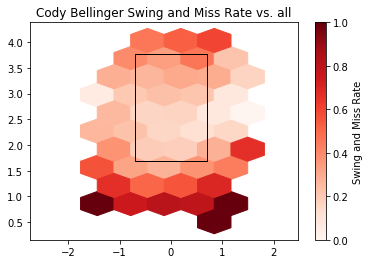

In [76]:
import matplotlib.pyplot as plt
batter_pitch_grapher(641355, 'Swing and Miss Rate', pitch_type = '')
plt.show()

Gathering Player Data
Gathering Player Data


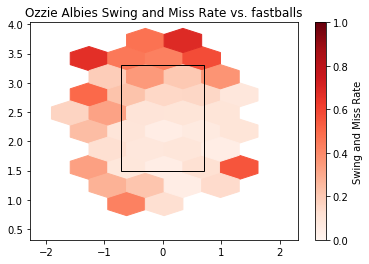

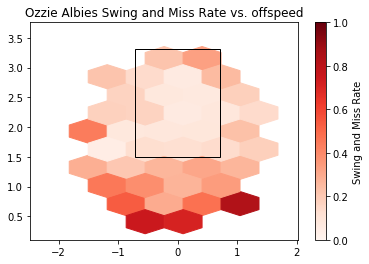

In [77]:
batter_pitch_grapher(645277, 'Swing and Miss Rate', pitch_type = 'fastballs')
batter_pitch_grapher(645277, 'Swing and Miss Rate', pitch_type = 'offspeed')

Gathering Player Data
Gathering Player Data


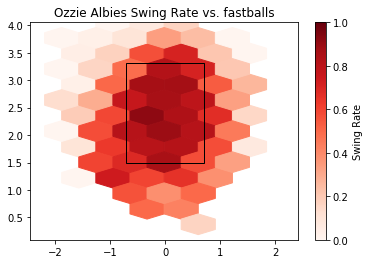

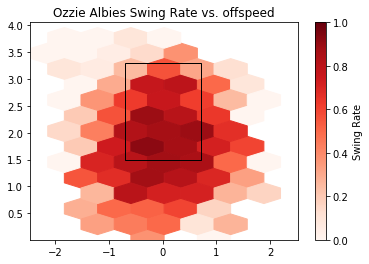

In [78]:
batter_pitch_grapher(645277, 'Swing Rate', pitch_type = 'fastballs')
batter_pitch_grapher(645277, 'Swing Rate', pitch_type = 'offspeed')